In [1]:
from __future__ import division
from IPython.display import display, HTML
import numpy
from matplotlib import pyplot
from sympy import *
init_printing(use_latex='mathjax')
%matplotlib inline

In [6]:
x, y, t = symbols(r'x y t')

def my2str(expr):
    s = ccode(expr)
    s = s.replace('M_PI', 'pi')
    s = s.replace('x', 'x[0]')
    s = s.replace('y', 'x[1]')
    return s

def plot_stream_func(s, t0, N):
    # Velocity components
    u = s.diff(y)
    v = -s.diff(x)

    print 's: %s\n\nu: %s\n\nv: %s' % (my2str(s), my2str(u), my2str(v))

    s = s.subs(t, t0)
    u = u.subs(t, t0)
    v = v.subs(t, t0)

    slam = lambdify((x,y), s, modules=['numpy'])
    ulam = lambdify((x,y), u, modules=['numpy'])
    vlam = lambdify((x,y), v, modules=['numpy'])

    X, Y = numpy.meshgrid(numpy.linspace(0, 1, N), numpy.linspace(0, 1, N))
    S = slam(X, Y)
    U = ulam(X, Y)
    V = vlam(X, Y)

    pyplot.figure()
    pyplot.contourf(X, Y, S, 30)
    pyplot.axis('equal')
    pyplot.colorbar()
    pyplot.title('Stream function')

    pyplot.figure()
    pyplot.contourf(X, Y, U, 30)
    pyplot.axis('equal')
    pyplot.colorbar()
    pyplot.title('Velocity X')

    pyplot.figure()
    pyplot.contourf(X, Y, V, 30)
    pyplot.axis('equal')
    pyplot.colorbar()
    pyplot.title('Velocity Y')

    pyplot.figure()
    pyplot.quiver(X, Y, U, V, scale=10)
    pyplot.axis('equal')
    pyplot.title('Velocity');
    

s: 0.01*tanh(100.0*sqrt(pow(x[0] - 0.25*cos(2*pi*t) - 0.5, 2) + pow(x[1] - 0.25*sin(2*pi*t) - 0.5, 2)) - 12.0)

u: 1.0*(-pow(tanh(100.0*sqrt(pow(x[0] - 0.25*cos(2*pi*t) - 0.5, 2) + pow(x[1] - 0.25*sin(2*pi*t) - 0.5, 2)) - 12.0), 2) + 1)*(x[1] - 0.25*sin(2*pi*t) - 0.5)/sqrt(pow(x[0] - 0.25*cos(2*pi*t) - 0.5, 2) + pow(x[1] - 0.25*sin(2*pi*t) - 0.5, 2))

v: -1.0*(-pow(tanh(100.0*sqrt(pow(x[0] - 0.25*cos(2*pi*t) - 0.5, 2) + pow(x[1] - 0.25*sin(2*pi*t) - 0.5, 2)) - 12.0), 2) + 1)*(x[0] - 0.25*cos(2*pi*t) - 0.5)/sqrt(pow(x[0] - 0.25*cos(2*pi*t) - 0.5, 2) + pow(x[1] - 0.25*sin(2*pi*t) - 0.5, 2))


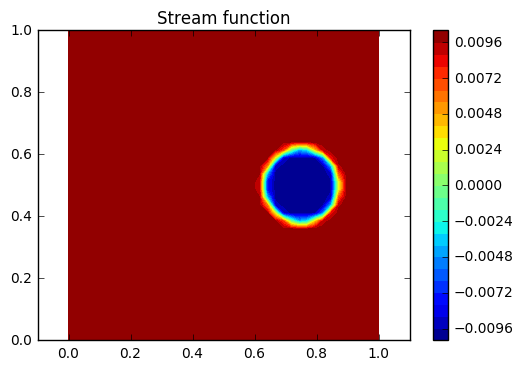

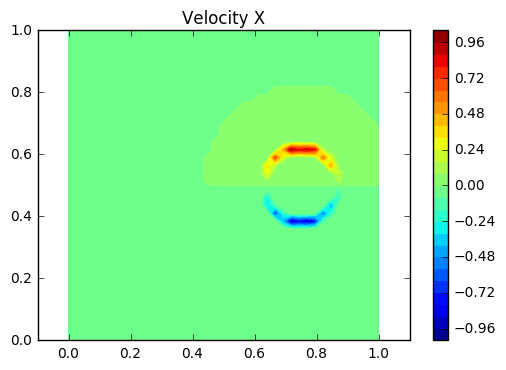

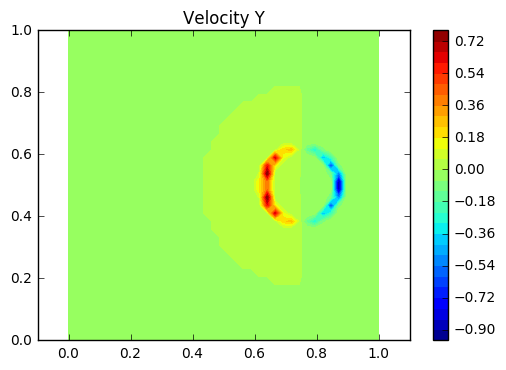

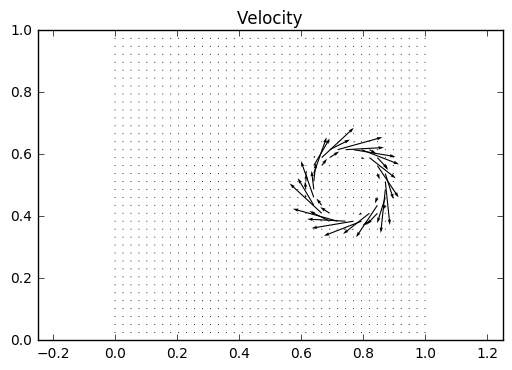

In [7]:
h = 0.01
r0 = 0.12
x0 = 0.5 + 0.25*cos(2*pi*t)
y0 = 0.5 + 0.25*sin(2*pi*t)
t0 = 0

r = sqrt((x - x0)**2 + (y - y0)**2)
s = tanh((r - r0)/ h) * h
plot_stream_func(s, t0, 40)